# COVID-19 Restrictions Start - Recursive multi-step forecasting with exogenous variables 
Explore impact of COVID-19 restrictions on Mental Health related searches through forecasting searches with Restrictions as Exogenous features and looking as feature importances.

In [11]:
import pandas as pd
import functions
import numpy as np
np.random.seed(42)


import pandas as pd
import warnings
import matplotlib.pyplot as plt
from skforecast.ForecasterAutoreg import ForecasterAutoreg

from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

---

## Most Restricted Forecasting for start of COVID-19 pandemic 

### with Exogenous Variables 


 Forecast for most_restricted and depression untill 2020-05-30 

Test error (mse): 59.76922216606119 



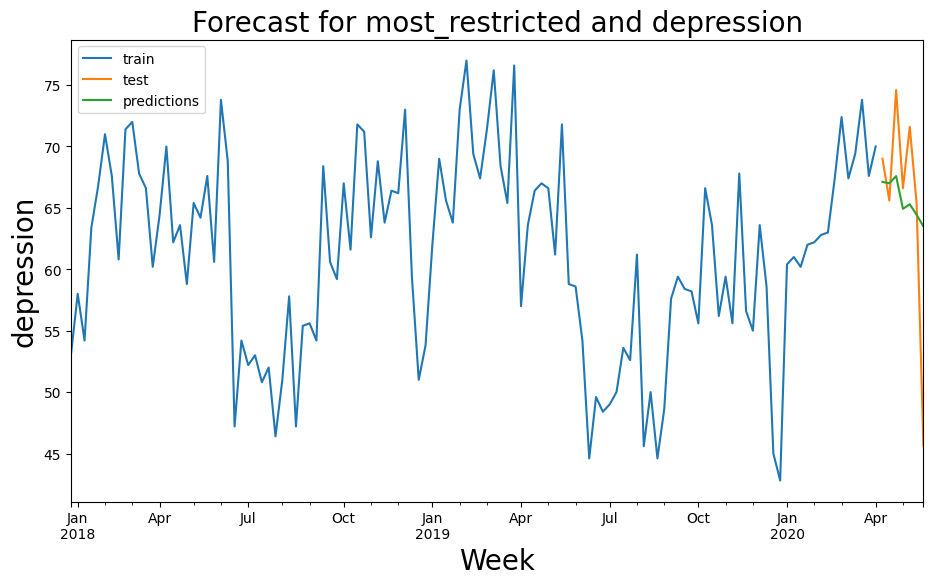


 Forecast for most_restricted and anxiety untill 2020-05-30 

Test error (mse): 6.715903984235177 



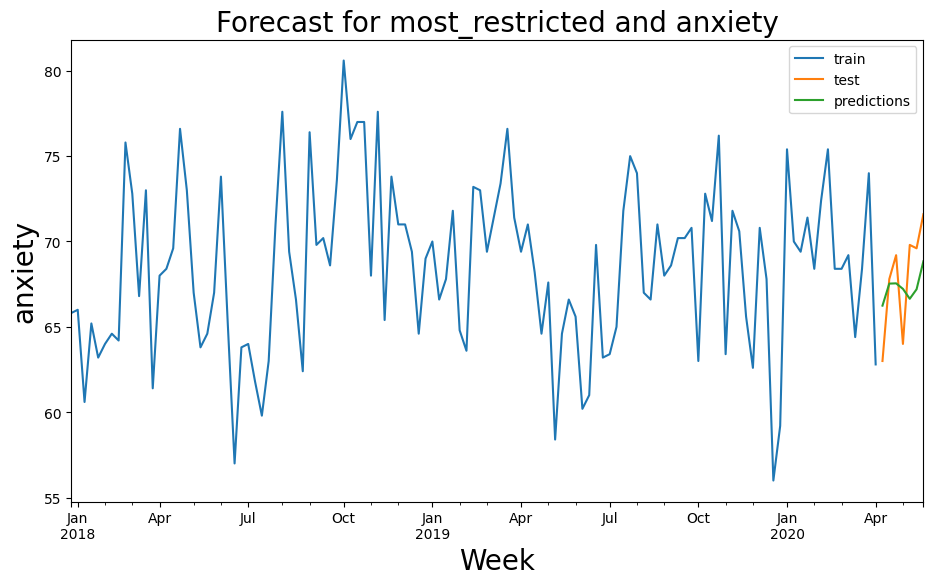


 Forecast for most_restricted and addiction untill 2020-05-30 

Test error (mse): 34.89825497581211 



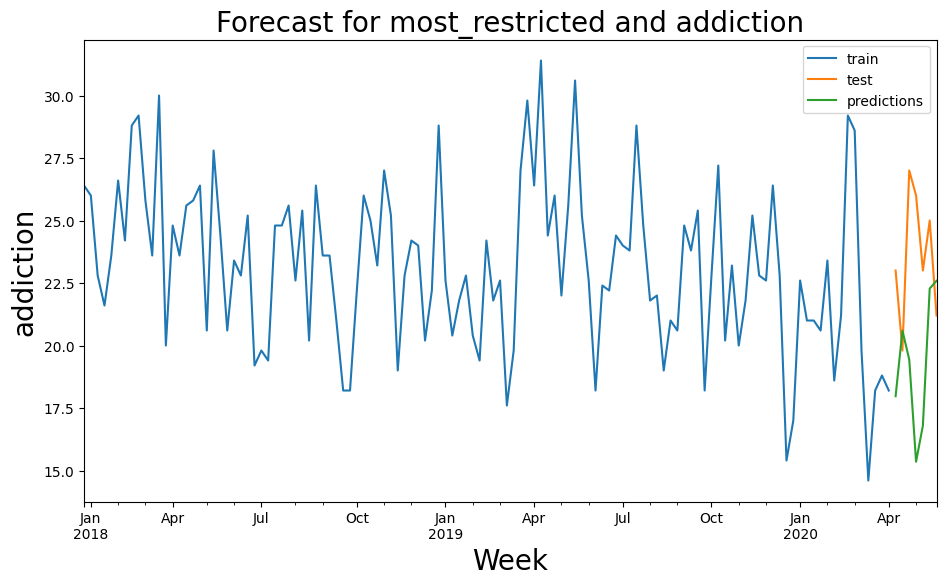


 Forecast for most_restricted and counselling untill 2020-05-30 

Test error (mse): 61.349871630984424 



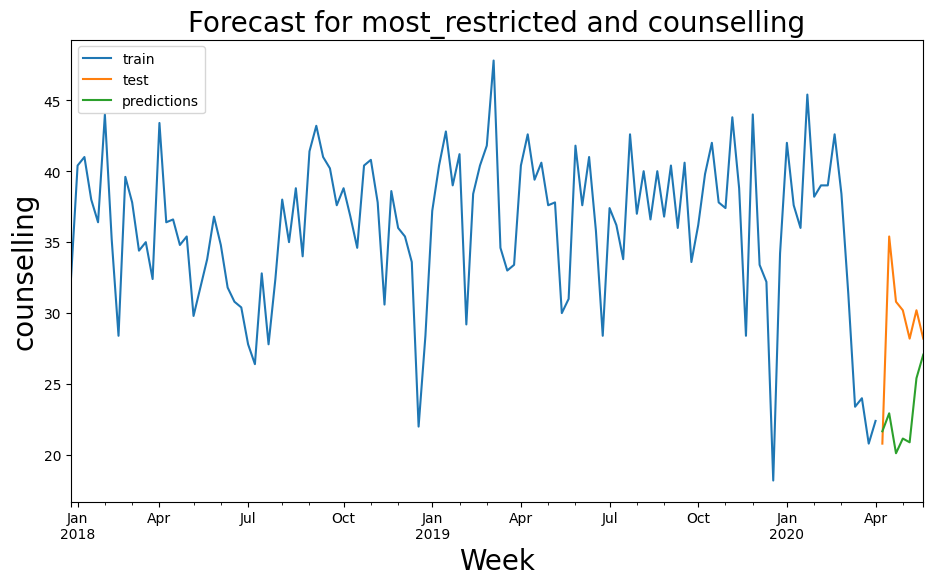


 Forecast for most_restricted and mental_health untill 2020-05-30 

Test error (mse): 43.206057666420406 



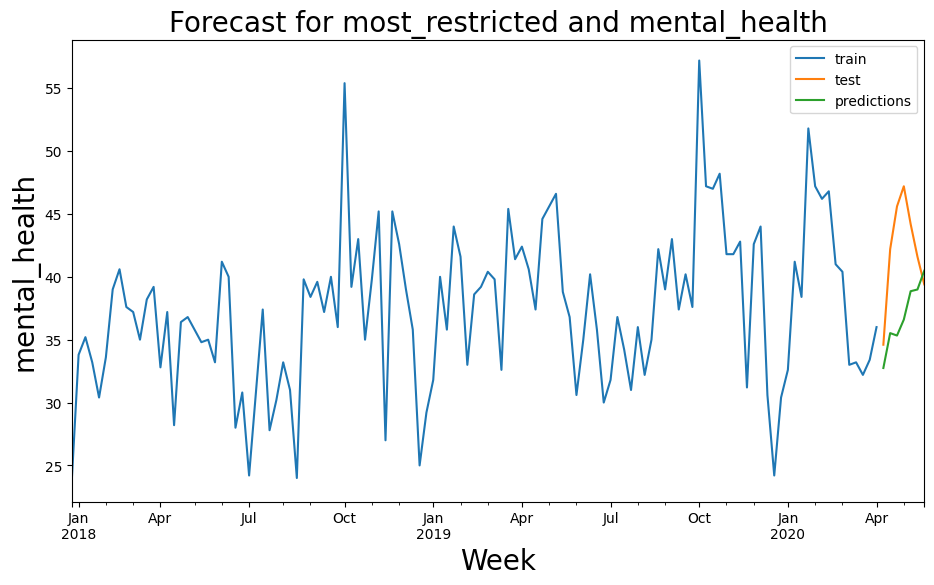

In [12]:
searches_list = ['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']
feature_imp_most = pd.DataFrame()
for search in searches_list:
        forecast = functions.forecast_file_search(file='most_restricted', period='2020-05-30', steps=7, search=search, regressor=Ridge(), lags=15)
        plt.show()
        if feature_imp_most.empty:
            feature_imp_most = forecast.get_feature_importance()
            feature_imp_most.rename(columns={'importance': search}, inplace=True)
        else:
            feature_imp_most = feature_imp_most.merge(forecast.get_feature_importance(), on = 'feature', how='left')
            feature_imp_most.rename(columns={'importance': search}, inplace=True)

MSE of all my models is lower than 100 and it is a good result without hyperparameter tuning. As we have several diffetent models and I want to compare them I will not chage the parameters.

In [13]:
# Get feature importanses only fot COVID-19 restrictions
feature_imp_most = feature_imp_most.loc[15:19]

### without Exogenous Variables 

In [14]:
searches_list = ['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']
for search in searches_list:
        functions.forecast_file_search_without_exogin(file='most_restricted', period='2020-05-30', steps=7, search=search, regressor=Ridge(), lags=15)


 Forecast for most_restricted and depression untill 2020-05-30 

Test error (mse): 59.16033588949857 


 Forecast for most_restricted and anxiety untill 2020-05-30 

Test error (mse): 6.387363207665463 


 Forecast for most_restricted and addiction untill 2020-05-30 

Test error (mse): 15.657997150395788 


 Forecast for most_restricted and counselling untill 2020-05-30 

Test error (mse): 57.995180062181866 


 Forecast for most_restricted and mental_health untill 2020-05-30 

Test error (mse): 51.37372104327743 



Mental health had the highest reduction of MSE from adding exogenous features. For Depression and Anexiety MSE stayed about the same with and without Exoginous features. Addiction and Counselling had better scores without exogenous features.

---

## Least Restricted Forecastingfor start of COVID-19 pandemic 

###  with Exogenous Variables 


 Forecast for least_restricted and depression untill 2020-05-30 

Test error (mse): 68.46450445927732 



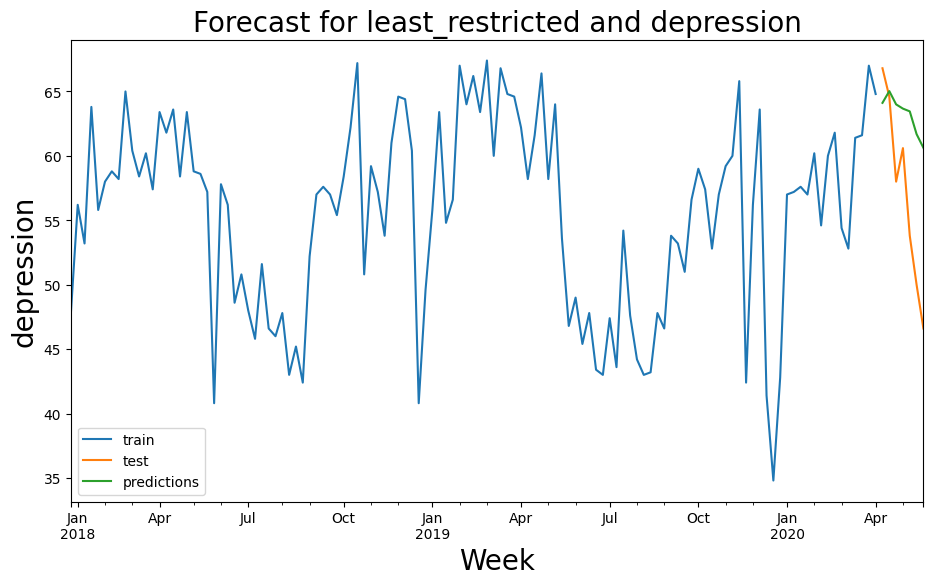


 Forecast for least_restricted and anxiety untill 2020-05-30 

Test error (mse): 24.067054369372425 



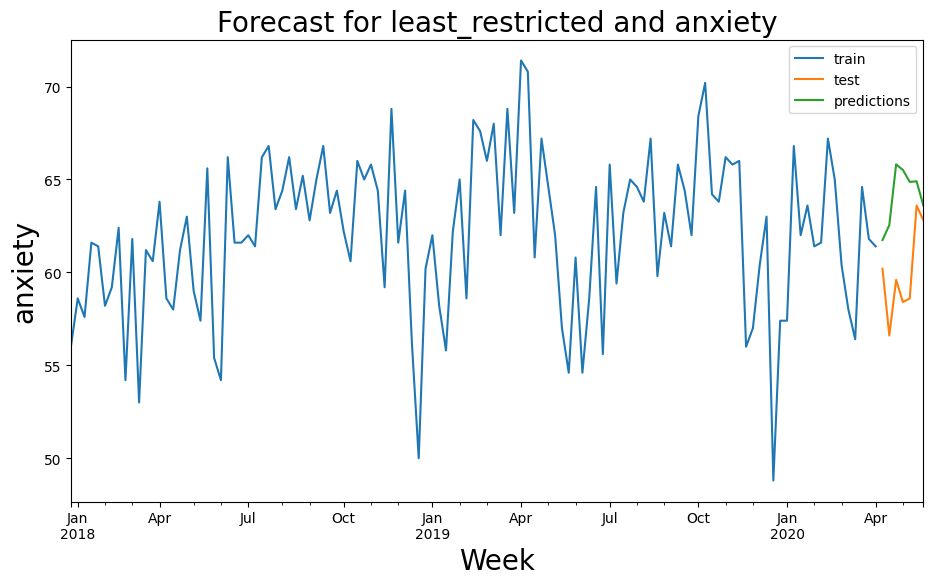


 Forecast for least_restricted and addiction untill 2020-05-30 

Test error (mse): 11.116394814025229 



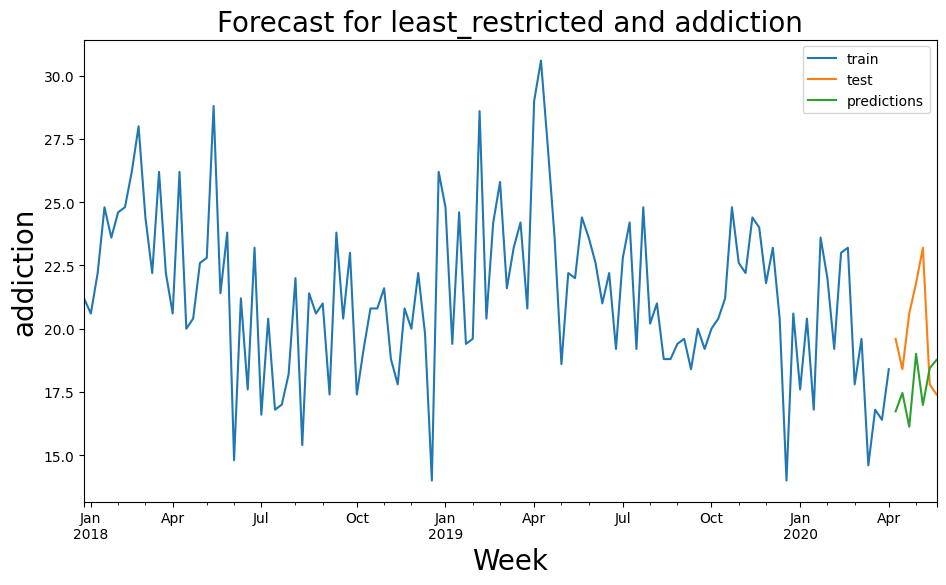


 Forecast for least_restricted and counselling untill 2020-05-30 

Test error (mse): 9.789459297139603 



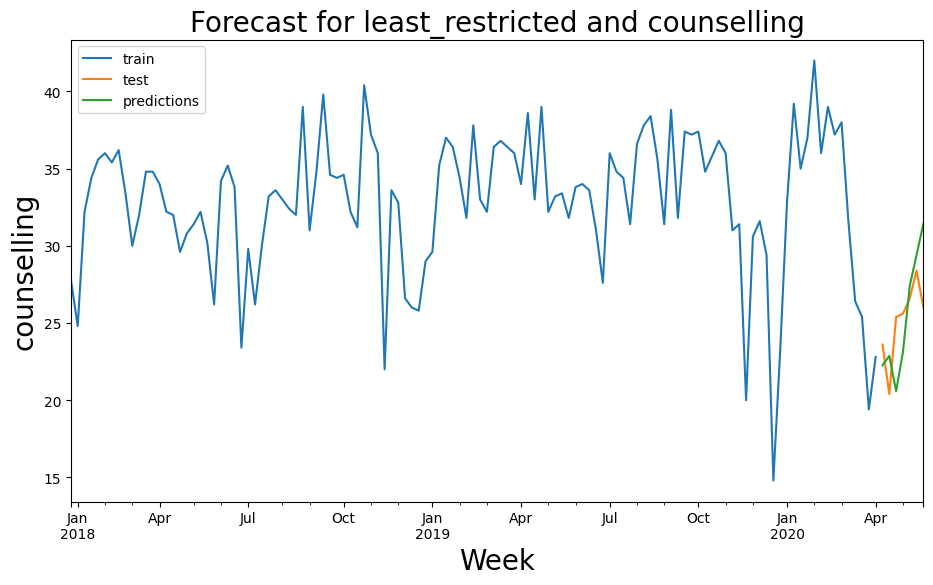


 Forecast for least_restricted and mental_health untill 2020-05-30 

Test error (mse): 4.684834741724319 



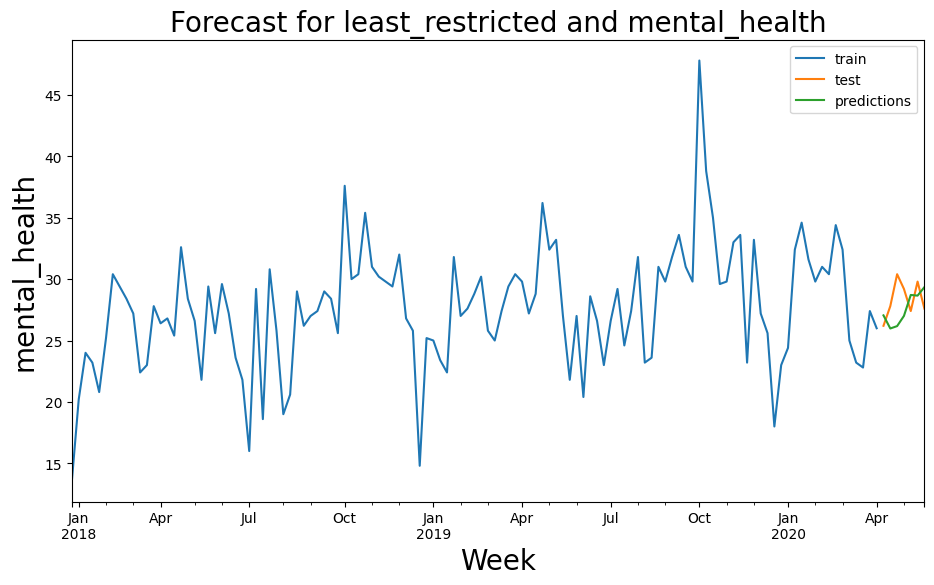

In [15]:
searches_list = ['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']
feature_imp_least = pd.DataFrame()
for search in searches_list:
        forecast = functions.forecast_file_search(file='least_restricted', period='2020-05-30', steps=7, search=search, regressor=Ridge(), lags=15)
        plt.show()
        if feature_imp_least.empty:
            feature_imp_least = forecast.get_feature_importance()
            feature_imp_least.rename(columns={'importance': search}, inplace=True)
        else:
            feature_imp_least = feature_imp_least.merge(forecast.get_feature_importance(), on = 'feature', how='left')
            feature_imp_least.rename(columns={'importance': search}, inplace=True)

MSE of all my models is lower than 100 and it is a good result without hyperparameter tuning. As we have several different models and I want to compare them I will not change the parameters.

In [16]:
# Get feature importanses only fot COVID-19 restrictions
feature_imp_least = feature_imp_least.iloc[15:]

### without Exogenous Variables 

In [17]:
searches_list = ['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']
for search in searches_list:
        functions.forecast_file_search_without_exogin(file='least_restricted', period='2020-05-30', steps=7, search=search, regressor=Ridge(), lags=15)


 Forecast for least_restricted and depression untill 2020-05-30 

Test error (mse): 24.963443025414865 


 Forecast for least_restricted and anxiety untill 2020-05-30 

Test error (mse): 15.650721555774982 


 Forecast for least_restricted and addiction untill 2020-05-30 

Test error (mse): 6.558564417352924 


 Forecast for least_restricted and counselling untill 2020-05-30 

Test error (mse): 54.79154778125543 


 Forecast for least_restricted and mental_health untill 2020-05-30 

Test error (mse): 6.0085000329592 



Counselling and Mental Health had much MSE with Exoginous features. Depression, Anxiety, and Addiction had lower scores without Exoginous features.

---

## Covid-19 Restrictions importances for forecasting 

In [18]:
# Combine feature importances from Most and Least Restricted States for comparison.
feature_imp_all = feature_imp_most.merge(feature_imp_least, on = 'feature', how='left', suffixes=['_most','_least'])

In [19]:
feature_imp_all.head()

,feature,depression_most,anxiety_most,addiction_most,counselling_most,mental_health_most,depression_least,anxiety_least,addiction_least,counselling_least,mental_health_least
0,stay_at_home,0.270833,-0.192771,-1.056046,-2.773385,0.120516,1.039474,0.210831,-0.516071,-1.385212,0.314808
1,mask_mandate,-0.491533,0.113436,-0.144873,0.058094,0.456263,0.000000,0.000000,0.000000,0.000000,0.000000
2,gatherings_banned,0.270833,-0.192771,-1.056046,-2.773385,0.120516,1.068492,0.606710,-0.594323,-2.211444,-0.152142
3,business_closures,0.270833,-0.192771,-1.056046,-2.773385,0.120516,0.274834,0.088112,-0.207525,-0.319377,-0.048095
4,travel_restrictions,0.352522,0.592591,-0.135494,-1.443338,-0.171225,1.284377,0.228135,-0.566581,-1.758440,0.520307


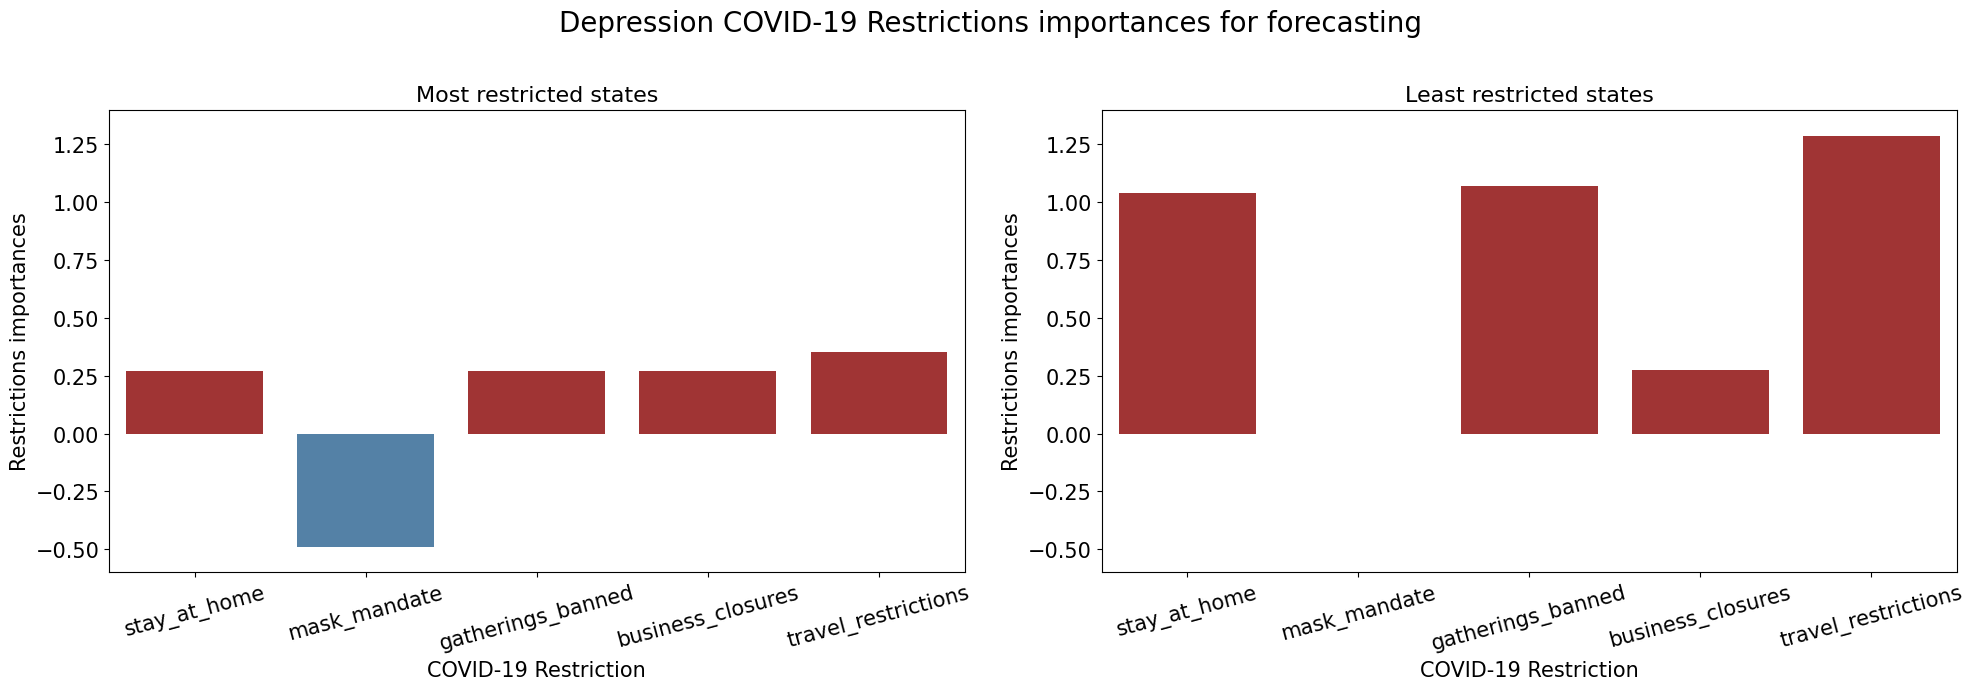

In [20]:
# Restriction importances for Depression
functions.plot_resiriction_importances(feature_imp_all, 'depression', ylim=[-0.6, 1.4], time='2020-05-30')

Unexpectedly the COVID restrictions impacted Least restricted states' searches more than Most Restricted. All of our least restricted states did not have mas mandates in the timeframe of this prediction - until May 2020

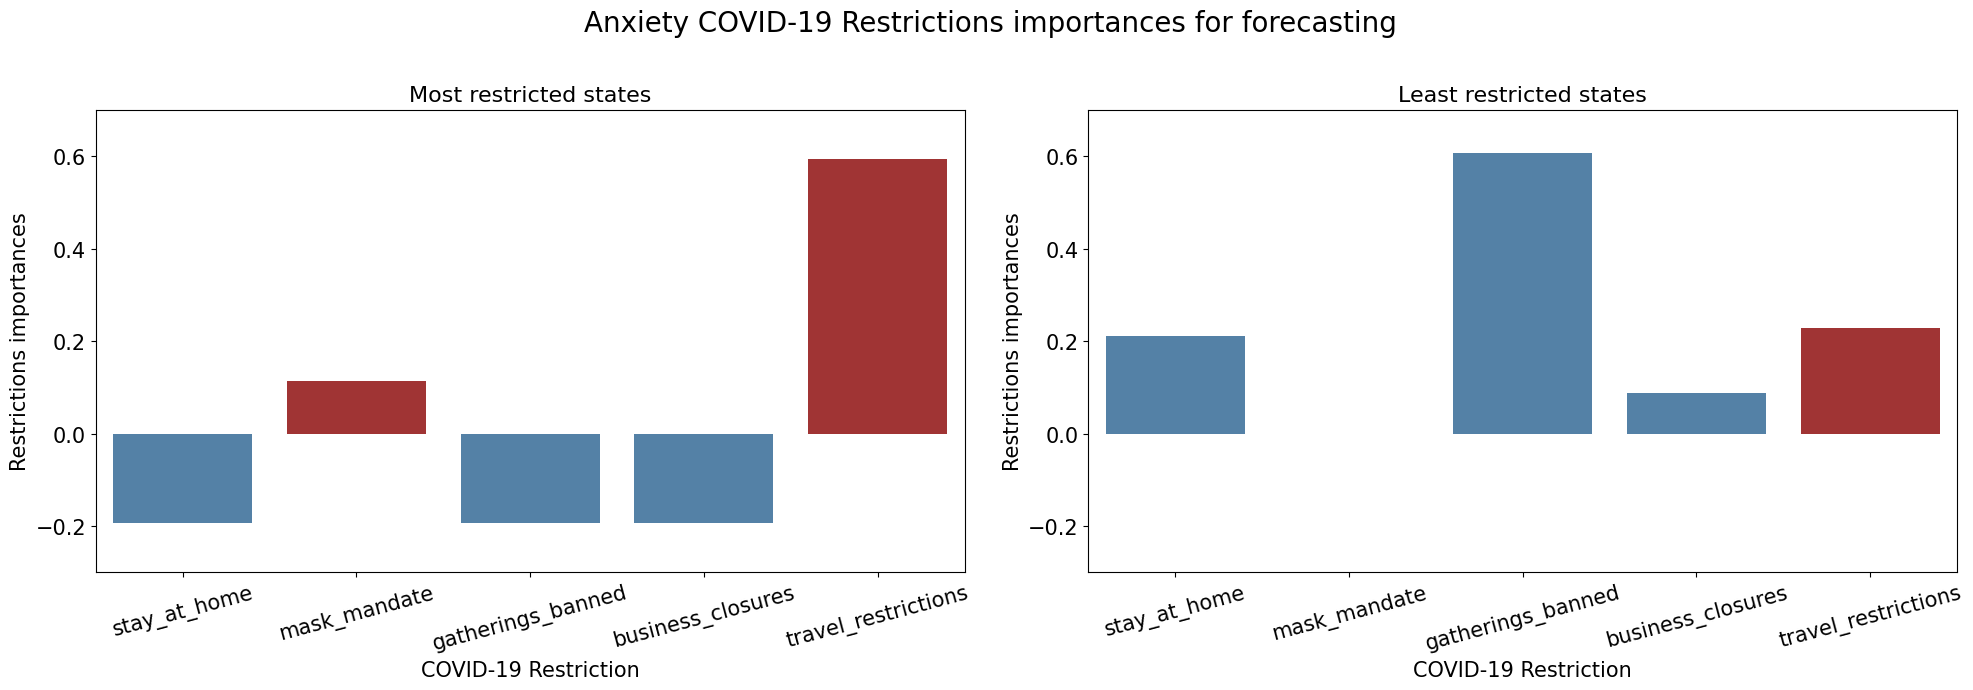

In [21]:
# Restriction importances for Anxiety
functions.plot_resiriction_importances(feature_imp_all, 'anxiety', ylim=[-0.3, 0.7], time='2020-05-30')

Anxiety has low feature importance for COVID restrictions. The most prominent are Trave_restriction for Most and Gatherings banned for Least Restricted States. They both correlated with a slight increase in Axienty searches.

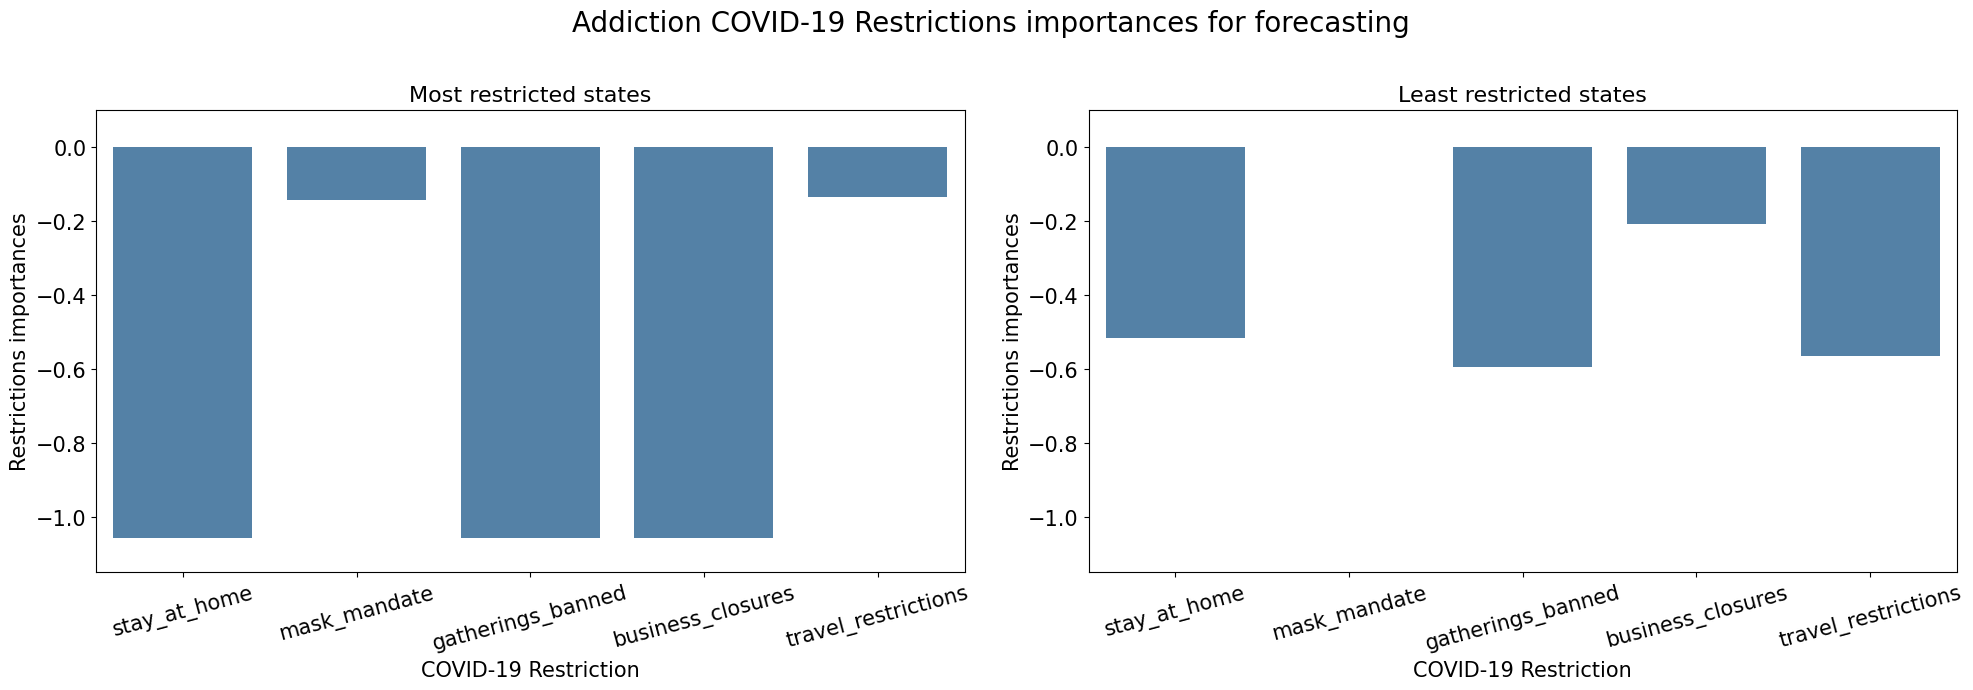

In [22]:
# Restriction importances for Addiction
functions.plot_resiriction_importances(feature_imp_all, 'addiction', ylim=[-1.15, 0.1], time='2020-05-30')

All restrictions had a negative correlation with Addiction searches, it is Stronger in Most Restricted States.

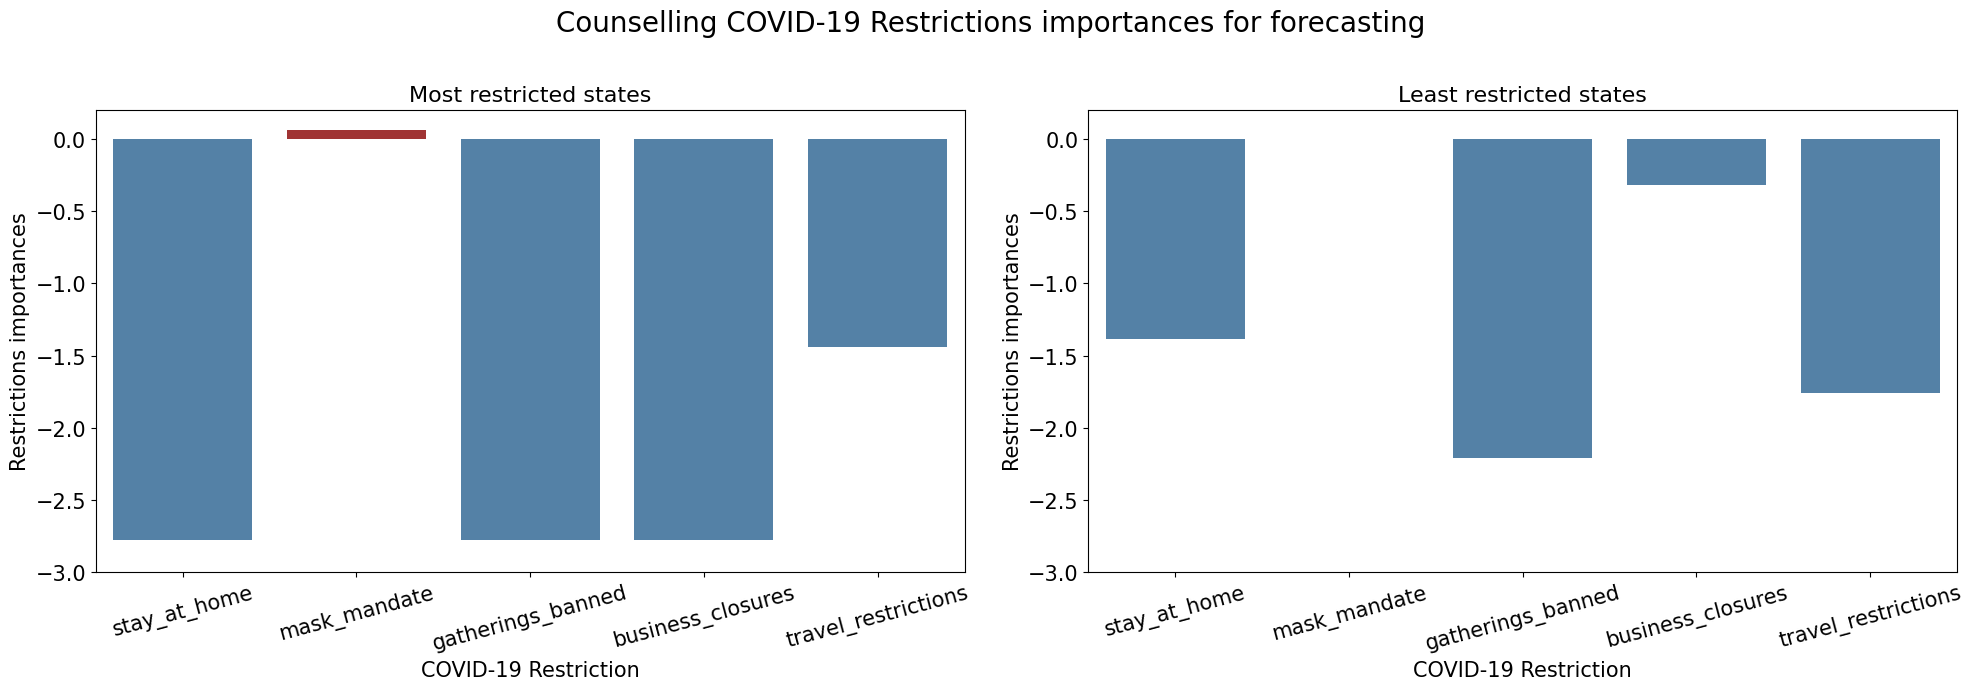

In [23]:
# Restriction importances for Counselling
functions.plot_resiriction_importances(feature_imp_all, 'counselling', ylim=[-3, 0.2], time='2020-05-30')

Most COVID-19 restrictions have quite strong negative impact on Counseling searches for both Most and Least Restricted States.

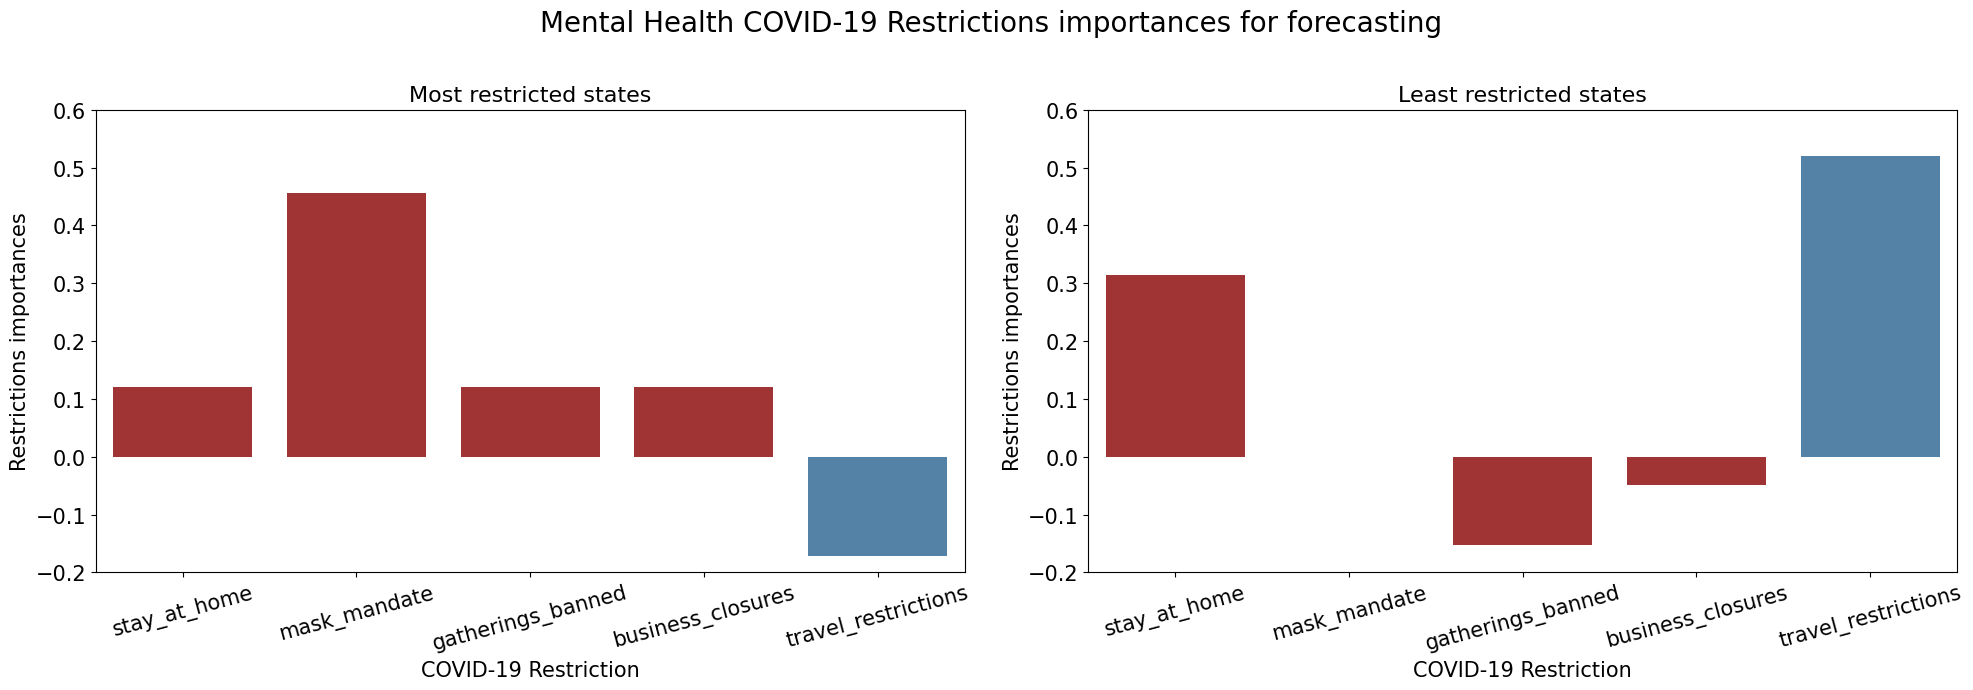

In [26]:
# Restriction importances for Mental Health
functions.plot_resiriction_importances(feature_imp_all, 'mental_health', ylim=[-0.2, 0.6], time='2020-05-30')

Mental Health searches have low feature importance for COVID restrictions. The most prominent are Mask Mandate for Most and Travel Restrictions for Least Restricted States. They both correlated with a slight increase in Axienty searches.

---

Counseling searches have the biggest feature importances for COVID-19 Restrictions. For other searches, the feature importances are quite low. In the nex notebook we will explore Feature importances for Searches during Middle part of COVID-19 Restrictions (until October 2020)